# 07_기계학습_2_군집화, 텍스트 마이닝, Neural Network

# 군집화

## KMeans
- 주요 Parameter : n_clusers=5, init='k-means++' 최초 중심점 설정 방식, max_iter=300
- 주요 속성 : labels 각 데이터 포인트가 속한 군집 중심점 레이블 / cluster_centers 중심점 좌표


### 군집화 수행

- 라이브러리, 데이터 로딩

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


- KMeans 수행

In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF) # X

- 결과 표시

In [4]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


- 군집화지만 실제와 비교해봄

In [7]:
irisDF['cluster'] = kmeans.labels_ # KMeans Clustering 결과를 데이터에 붙임
irisDF['target'] = iris.target # 군집화인데 그래도 y를 붙여본다
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


### 새로운 데이터들에 군집 레이블링하기
- 전처리를 똑같이 해줘야한다

In [ ]:
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

### 최적 군집 개수 계산

#### 성능평가 : 오차제곱합(SSE) 시각화 - 엘보우 찾기

In [11]:
kmeans.inertia_ # 이게 SSE

78.85144142614601

- 군집 개수를 1개 ~ 10개로 비교

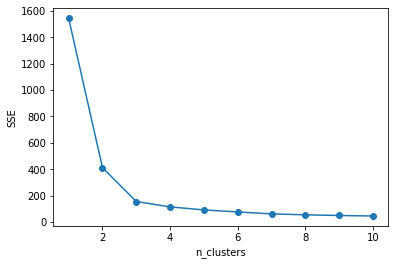

In [14]:
def elbow(X):
    sse = [] # 오차제곱합
    for i in range(1,11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker ='o')
    plt.xlabel('n_clusters')
    plt.ylabel('SSE')
    plt.show()
    
elbow(irisDF)

**해석**
- 3개일 때가 최적

#### 성능평가 : 실루엣 분석 
- 수치가 높을 수록 좋은 것 (0~1)

In [25]:
X = irisDF.iloc[:,0:4]

- cluster 개수 2개~10개에 따른 실루엣 계수 확인

In [41]:
from sklearn.metrics import silhouette_samples, silhouette_score

def sil(X):
    si = [] # 실루엣계수
    for i in range(2,11): # cluster가 2개인것 부터 10개까지!!!!
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        si.append(silhouette_score(X, km.labels_))
    print(np.round(si,3))
sil(X)

[0.681 0.553 0.498 0.493 0.365 0.357 0.362 0.349 0.331]


- 이건 k 개수 하나 찍어서 KMeans 수행하고, 그 결과 'cluster'로 실루엣 상세 확인하는 법

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score

# 모든 데이터의 평균 실루엣 계수값을 구함. --> 이게 대표값이라 해야하나, 평균 실루엣 계수 값
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함.  --> 데이터 각 행별 실루엣 계수값
score_samples = silhouette_samples(iris.data, irisDF['cluster']) # (X, KMeans 결과)
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)
# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 군집별 실루엣 계수
irisDF.groupby('cluster')['silhouette_coeff'].mean()

붓꽃 데이터셋 Silhouette Analysis Score:0.553
silhouette_samples( ) return 값의 shape (150,)


cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

In [18]:
# 데이터 각각의 실루엣 계수
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397,0.852955
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001,0.815495
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949,0.829315
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299,0.805014
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755,0.849302


### 군집화 결과 시각화 수행
- 데이터의 변수가 4개라 PCA를 통해 2개 요소로 줄여서 산점도 구현

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


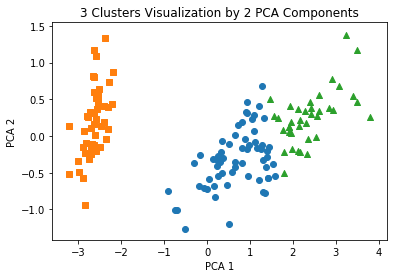

In [9]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

## 평균 이동 (Mean Shift)
- 컴퓨터 비전, 이미지/영상 인식 등에 주로 사용
- KMeans는 데이터의 평균 거리 중심으로 이동하는 반면, 평균 이동은 중심이 데이터 밀도가 높은 곳으로 이동 시킴
- 확률밀도함수를 이용함
- 군집의 개수 지정이 필요 없음, 대신 대역폭(bandwidth)의 값을 지정함

- 라이브러리 로딩 및 데이터 생성

In [42]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.8, random_state=0)

- 최적 bandwidth 개수 찾기

In [47]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X,quantile=0.2)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.444


- 평균 이동 군집화 시행

In [46]:
# bandwidth = 1의 평균 이동 군집 --> label 3개
meanshift= MeanShift(bandwidth=1.444)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3]


In [49]:
cluster_labels[:20]

array([1, 2, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 3, 1],
      dtype=int64)


## GMM 군집화 (Gaussian Mixture Model)
- 여러 개의 가우시안 분포가 섞인 것으로 간주
- KMeans는 거리 기반 군집화인 반면, GMM은 확률 기반 군집화임
- 주요 파라미터 : n_components=3 섞인 정규분포의 개수가 3개라는 뜻

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data) # X 투입(군집화니까 y는 없을 수도 있음)
gmm_cluster_labels = gmm.predict(iris.data) # 결과를 뱉어줌

## DBSCAN 밀도 기반 군집화
- 주요 파라미터 : eps 입실론 주변 영역의 반경 / min_samples 핵심 포인트가 되기 위한 최소 데이터 수

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

# 결과 붙여서 실제 y와 비교해보기
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)